In [7]:
import pandas as pd

pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.expand_frame_repr", False)  # 가로로 긴 데이터프레임 줄바꿈 방지

In [8]:
data = pd.read_csv(
    "./2nd_Preprocessing.csv", na_values=["", "NaN"], keep_default_na=False
)

In [9]:
data

,ID,Birth Date,Fibrosis Stage,NAFLD Type,Death Date,Last F/U,Smoking,LRE,LRE Date,SBP,DBP,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen HU,CT_B date,FS_date,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,Weight,Height,BMI,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,Death,VFI,SFI,TFI,SMI
0,543747,1947-12-22,Low,None,0,2021-01-25,0.0,0.0,0,124.0,85.0,1032.168688,1391.775625,110.074938,106.421807,172.502012,92.514199,-98.940834,-105.830856,24.545614,1.347252,2011-07-07,NaN,NaN,NaN,20,24,1.1,222.0,0.97,4.5,88,NaN,80.519,193.0,NaN,NaN,149.0,57.0,160.0,22.265625,0,0,0,0,0,0,0,403.190894,543.662354,946.853247,36.138359
1,556772,1952-01-14,Low,None,0,2023-10-16,0.0,0.0,0,105.0,74.0,508.070781,1172.271125,143.808031,89.713623,151.592969,82.512139,-102.518898,-114.544617,29.191065,1.124264,2017-05-11,2017-03-24,3.4,206.0,24,27,0.8,285.0,1.05,3.9,138,NaN,106.448,215.0,56,158.0,108.0,54.0,158.0,21.631149,0,0,1,0,0,0,0,203.521383,469.584652,673.106035,33.052451
2,1124503,1980-11-05,Low,Probable NASH,0,2021-03-23,0.0,0.0,0,140.0,95.0,1053.408625,1109.963250,175.678844,123.377666,112.070576,196.325938,-104.391289,-106.446663,51.848907,0.757789,2014-07-03,NaN,NaN,NaN,33,64,1.2,267.0,1.00,4.7,91,NaN,94.747,202.0,NaN,NaN,NaN,77.0,172.0,26.027582,0,0,0,0,0,0,0,356.073765,375.190390,731.264155,66.362202
3,1132625,1963-08-18,High,NASH,0,2023-07-13,0.0,0.0,0,100.0,72.0,367.436000,661.771375,318.200906,63.613037,115.604648,95.390977,-88.249924,-96.067482,26.033854,1.143369,2014-09-02,2014-09-22,10.6,200.0,60,44,0.6,104.0,1.25,2.4,110,NaN,150.751,135.0,16,NaN,163.0,46.0,153.0,19.650562,0,0,0,0,0,0,0,156.963561,282.699549,439.663110,40.749702
4,1196873,1944-09-13,Low,NAFL,0,2021-03-05,0.0,0.0,0,134.0,76.0,778.699562,880.497562,82.088250,149.392520,140.085840,82.569297,-93.448448,-96.387665,33.130249,1.307483,2015-08-21,2015-08-25,6.4,191.0,19,18,0.6,297.0,0.87,4.5,145,NaN,82.726,161.0,34,47.0,69.0,57.0,155.0,23.725286,0,0,1,0,1,0,0,324.120525,366.492221,690.612747,34.368074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,10702453,1995-07-29,Low,NASH,0,2023-06-19,NaN,0.0,0,128.0,80.0,2533.261000,4405.562500,397.485187,268.822012,423.384180,222.130059,-116.268593,-118.933777,36.584408,0.622285,2022-10-31,2022-10-17,10.5,371.0,210,307,0.7,316.0,1.02,4.7,95,6.2,123.030,170.0,39,NaN,166.0,135.1,185.0,39.474069,1,0,0,0,0,0,0,740.178524,1287.235208,2027.413733,64.902866
237,10758287,1992-10-14,Low,NAFL,0,2023-04-17,NaN,0.0,0,122.0,79.0,1884.283250,3384.413500,166.165469,182.332598,307.443945,119.548301,-106.076172,-114.722511,24.092590,0.861414,2022-12-27,2023-01-13,4.0,287.0,18,28,0.5,314.0,1.00,4.3,92,NaN,124.539,235.0,61,NaN,177.0,80.9,156.7,32.946594,0,0,0,0,0,0,0,767.375969,1378.305299,2145.681268,48.686148
238,10830200,1982-11-15,High,NASH,0,2023-10-23,1.0,3.0,2023-03-29 00:00:00,104.0,64.0,328.191062,399.722375,500.323937,131.007793,111.203740,123.082363,-88.774452,-86.476700,32.814487,1.126708,2023-07-01,NaN,NaN,NaN,53,95,4.2,261.0,1.01,3.7,279,5.8,108.632,120.0,6,38.0,171.0,68.1,169.5,23.703240,0,1,0,0,0,0,0,114.231885,139.129445,253.361331,42.840686
239,10837314,1988-12-27,Low,Probable NASH,0,2023-09-01,NaN,0.0,0,118.0,84.0,1026.574625,1343.746875,137.944938,142.086250,181.341914,209.338145,-108.974594,-104.784889,48.526211,0.279951,2023-04-22,2023-04-26,9.8,362.0,62,158,0.6,278.0,1.01,4.8,95,NaN,86.533,312.0,NaN,NaN,NaN,90.0,180.0,27.777778,0,0,0,0,0,0,0,316.844020,414.736690,731.580710,64.610539


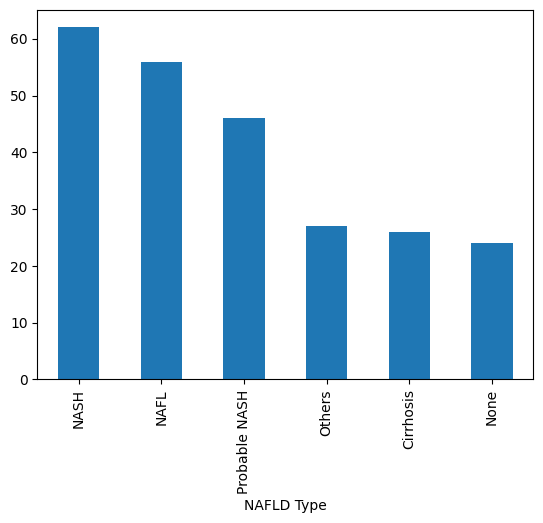

In [10]:
# data counting하여 막대그래프 그리기
import matplotlib.pyplot as plt

data["NAFLD Type"].value_counts().plot(kind="bar")
plt.show()

In [124]:
data_xCirr = data[data["NAFLD Type"] != "Cirrhosis"]

In [ ]:
data_xCirr = data_xCirr[data_xCirr["NAFLD Type"] != "Others"]

NAFLD Type
NASH             62
NAFL             56
Probable NASH    46
Others           27
None             24
Name: count, dtype: int64
total count: 215


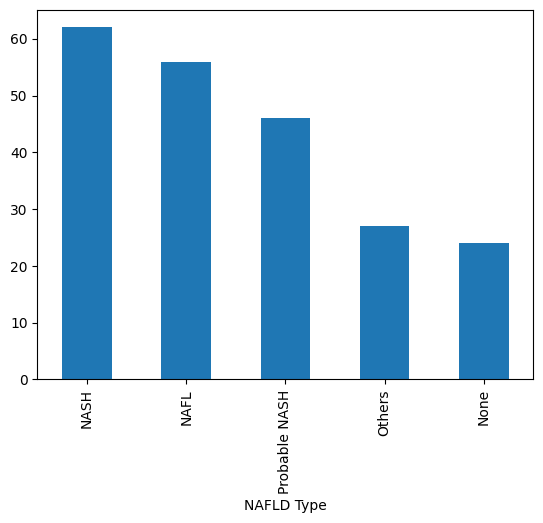

In [87]:
# data counting하여 막대그래프 그리기
import matplotlib.pyplot as plt

print(data_xCirr["NAFLD Type"].value_counts())
print(f"total count: {data_xCirr['NAFLD Type'].count()}")
data_xCirr["NAFLD Type"].value_counts().plot(kind="bar")
plt.show()

Pearson Correlation Coefficient Matrix:
                 BMI VFA (Area) SFA (Area)       VFI       SFI       TFI       SMI
BMI              1.0   0.564299   0.773772  0.562317   0.66053  0.685155  0.527018
VFA (Area)  0.564299        1.0   0.342819  0.783774  0.270474  0.477841  0.407379
SFA (Area)  0.773772   0.342819        1.0  0.437224  0.821766  0.758893   0.22869
VFI         0.562317   0.783774   0.437224       1.0  0.639279  0.825558   0.28402
SFI          0.66053   0.270474   0.821766  0.639279       1.0  0.961708  0.174161
TFI         0.685155   0.477841   0.758893  0.825558  0.961708       1.0  0.229039
SMI         0.527018   0.407379    0.22869   0.28402  0.174161  0.229039       1.0

P-value Matrix:
            BMI VFA (Area) SFA (Area)       VFI       SFI       TFI       SMI
BMI         0.0        0.0        0.0       0.0       0.0       0.0       0.0
VFA (Area)  0.0        0.0   0.000001       0.0  0.000174       0.0       0.0
SFA (Area)  0.0   0.000001        0.0       0

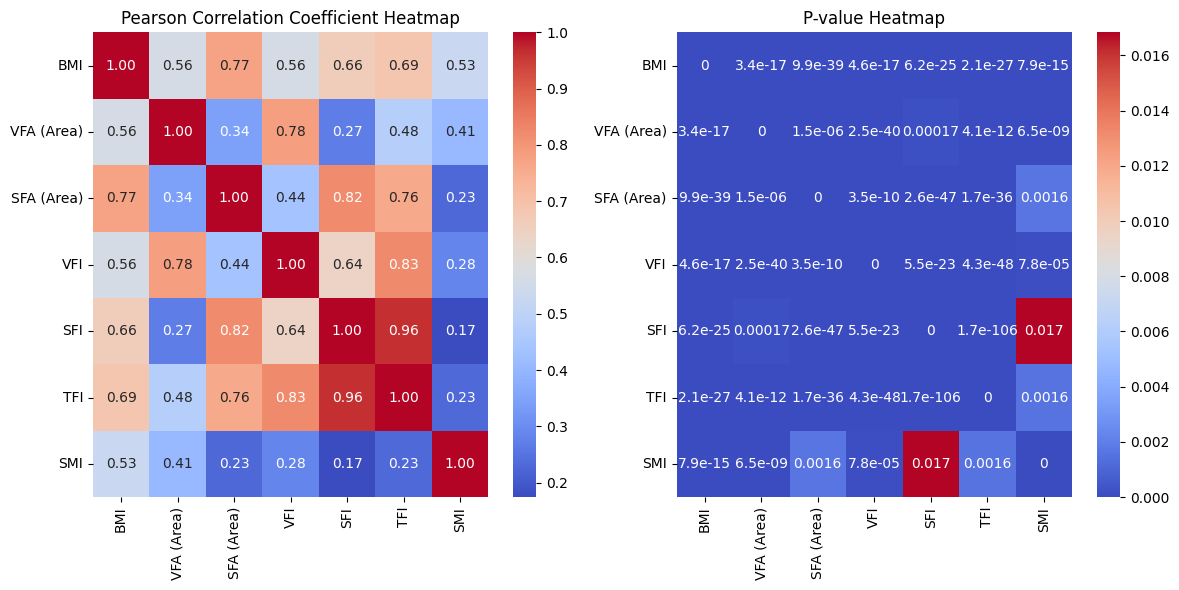

In [20]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import seaborn as sns

# 열 선택
columns_of_interest = ["BMI", "VFA (Area)", "SFA (Area)", "VFI", "SFI", "TFI", "SMI"]

# 상관계수와 p-value 저장을 위한 빈 데이터프레임 생성
correlation_results = pd.DataFrame(
    index=columns_of_interest, columns=columns_of_interest
)

# p-value 저장용 데이터프레임
p_values = pd.DataFrame(index=columns_of_interest, columns=columns_of_interest)

# 상관계수와 p-value 계산
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 == col2:
            # 자기 자신과의 상관계수는 1, p-value는 0으로 설정
            correlation_results.loc[col1, col2] = 1.0
            p_values.loc[col1, col2] = 0.0
        else:
            r, p = pearsonr(data_xCirr[col1], data_xCirr[col2])
            correlation_results.loc[col1, col2] = r
            p_values.loc[col1, col2] = p

# 결과 출력
print("Pearson Correlation Coefficient Matrix:")
print(correlation_results)

print("\nP-value Matrix:")
print(p_values)

# 히트맵 시각화 (상관계수와 p-value)
plt.figure(figsize=(12, 6))

# 상관계수 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(correlation_results.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Coefficient Heatmap")

# P-value 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(p_values.astype(float), annot=True, cmap="coolwarm", fmt=".2g", cbar=True)
plt.title("P-value Heatmap")

plt.tight_layout()
plt.show()

In [125]:
data_xCirr["Fibrosis Stage"].value_counts(dropna=False)

Fibrosis Stage
Low     186
High     29
Name: count, dtype: int64

In [126]:
# ID = 1937295 인 행 하나만 제거
data_xCirr = data_xCirr[data_xCirr["ID"] != 1937295]

In [26]:
data_xCirr.columns

Index(['ID', 'Birth Date', 'Fibrosis Stage', 'NAFLD Type', 'Death Date',
       'Last F/U', 'Smoking', 'LRE', 'LRE Date', 'SBP', 'DBP', 'VFA (Volume)',
       'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)',
       'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen HU', 'CT_B date', 'FS_date', 'LSM',
       'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose',
       'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'Weight', 'Height',
       'BMI', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'Death', 'VFI', 'SFI', 'TFI', 'SMI'],
      dtype='object')

In [127]:
full_data = pd.read_csv(
    "./liver_index.csv", na_values=["", "NaN"], keep_default_na=False
)

In [62]:
full_data.columns

Index(['ID', 'Liver/Spleen Volume Ratio', 'mean HU(Liver) - mean HU(Spleen)',
       'Liver/Spleen HU Ratio', 'Liver Fat (PDFF)', 'Liver Mask Volume',
       'Spleen Mask Volume', 'Liver Mean HU', 'Spleen Mean HU', 'Fibrosis'],
      dtype='object')

In [128]:
full_data["Fibrosis"].value_counts(dropna=False)

Fibrosis
NaN        123
1a          44
3           32
2           31
4           27
1b          23
1c           9
1            2
Missing      1
Name: count, dtype: int64

In [129]:
mapping = {"1": 1, "1a": 1, "1b": 1, "1c": 1, "2": 2, "3": 3, "4": 4, "Missing": 1}

full_data["Fibrosis Number"] = full_data["Fibrosis"].map(mapping).fillna(0)
full_data["Fibrosis Number"].value_counts(dropna=False)

Fibrosis Number
0.0    123
1.0     79
3.0     32
2.0     31
4.0     27
Name: count, dtype: int64

In [84]:
full_data.columns

Index(['ID', 'Liver/Spleen Volume Ratio', 'mean HU(Liver) - mean HU(Spleen)',
       'Liver/Spleen HU Ratio', 'Liver Fat (PDFF)', 'Liver Mask Volume',
       'Spleen Mask Volume', 'Liver Mean HU', 'Spleen Mean HU', 'Fibrosis',
       'Fibrosis Number'],
      dtype='object')

In [139]:
# ID를 primary KEY로 해서 data에 있는 ID에 대해서만 full_data에서 가져오기 열도 당연히 추가
data = data.merge(
    full_data[
        [
            "ID",
            "Liver/Spleen Volume Ratio",
            "mean HU(Liver) - mean HU(Spleen)",
            "Liver/Spleen HU Ratio",
            "Liver Fat (PDFF)",
            "Liver Mask Volume",
            "Spleen Mask Volume",
            "Liver Mean HU",
            "Spleen Mean HU",
            "Fibrosis Number",
        ]
    ],
    on="ID",
    how="left",
)

data

,ID,Birth Date,Fibrosis Stage,NAFLD Type,Death Date,Last F/U,Smoking,LRE,LRE Date,SBP,DBP,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen HU,CT_B date,FS_date,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,Weight,Height,BMI,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,Death,VFI,SFI,TFI,SMI,Liver/Spleen Volume Ratio,mean HU(Liver) - mean HU(Spleen),Liver/Spleen HU Ratio,Liver Fat (PDFF),Liver Mask Volume,Spleen Mask Volume,Liver Mean HU,Spleen Mean HU,Fibrosis Number
0,543747,1947-12-22,Low,None,0,2021-01-25,0.0,0.0,0,124.0,85.0,1032.168688,1391.775625,110.074938,106.421807,172.502012,92.514199,-98.940834,-105.830856,24.545614,1.347252,2011-07-07,NaN,NaN,NaN,20,24,1.1,222.0,0.97,4.5,88,NaN,80.519,193.0,NaN,NaN,149.0,57.0,160.0,22.265625,0,0,0,0,0,0,0,403.190894,543.662354,946.853247,36.138359,8.252824,13.763145,1.347252,6.522456,908.429000,110.074938,53.397648,39.634502,0.0
1,556772,1952-01-14,Low,None,0,2023-10-16,0.0,0.0,0,105.0,74.0,508.070781,1172.271125,143.808031,89.713623,151.592969,82.512139,-102.518898,-114.544617,29.191065,1.124264,2017-05-11,2017-03-24,3.4,206.0,24,27,0.8,285.0,1.05,3.9,138,NaN,106.448,215.0,56,158.0,108.0,54.0,158.0,21.631149,0,0,1,0,0,0,0,203.521383,469.584652,673.106035,33.052451,4.939308,5.803654,1.124264,7.686099,710.312188,143.808031,52.507729,46.704075,0.0
2,1124503,1980-11-05,Low,Probable NASH,0,2021-03-23,0.0,0.0,0,140.0,95.0,1053.408625,1109.963250,175.678844,123.377666,112.070576,196.325938,-104.391289,-106.446663,51.848907,0.757789,2014-07-03,NaN,NaN,NaN,33,64,1.2,267.0,1.00,4.7,91,NaN,94.747,202.0,NaN,NaN,NaN,77.0,172.0,26.027582,0,0,0,0,0,0,0,356.073765,375.190390,731.264155,66.362202,7.628467,-11.991894,0.757789,15.822743,1340.160250,175.678844,37.518139,49.510033,1.0
3,1132625,1963-08-18,High,NASH,0,2023-07-13,0.0,0.0,0,100.0,72.0,367.436000,661.771375,318.200906,63.613037,115.604648,95.390977,-88.249924,-96.067482,26.033854,1.143369,2014-09-02,2014-09-22,10.6,200.0,60,44,0.6,104.0,1.25,2.4,110,NaN,150.751,135.0,16,NaN,163.0,46.0,153.0,19.650562,0,0,0,0,0,0,0,156.963561,282.699549,439.663110,40.749702,4.009127,5.402699,1.143369,13.075651,1275.707750,318.200906,43.086437,37.683739,3.0
4,1196873,1944-09-13,Low,NAFL,0,2021-03-05,0.0,0.0,0,134.0,76.0,778.699562,880.497562,82.088250,149.392520,140.085840,82.569297,-93.448448,-96.387665,33.130249,1.307483,2015-08-21,2015-08-25,6.4,191.0,19,18,0.6,297.0,0.87,4.5,145,NaN,82.726,161.0,34,47.0,69.0,57.0,155.0,23.725286,0,0,1,0,1,0,0,324.120525,366.492221,690.612747,34.368074,13.770583,13.645325,1.307483,5.694679,1130.403125,82.088250,58.022766,44.377441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,10702453,1995-07-29,Low,NASH,0,2023-06-19,NaN,0.0,0,128.0,80.0,2533.261000,4405.562500,397.485187,268.822012,423.384180,222.130059,-116.268593,-118.933777,36.584408,0.622285,2022-10-31,2022-10-17,10.5,371.0,210,307,0.7,316.0,1.02,4.7,95,6.2,123.030,170.0,39,NaN,166.0,135.1,185.0,39.474069,1,0,0,0,0,0,0,740.178524,1287.235208,2027.413733,64.902866,7.197551,-17.154186,0.622285,21.976437,2860.920250,397.485187,28.261475,45.415661,1.0
237,10758287,1992-10-14,Low,NAFL,0,2023-04-17,NaN,0.0,0,122.0,79.0,1884.283250,3384.413500,166.165469,182.332598,307.443945,119.548301,-106.076172,-114.722511,24.092590,0.861414,2022-12-27,2023-01-13,4.0,287.0,18,28,0.5,314.0,1.00,4.3,92,NaN,124.539,235.0,61,NaN,177.0,80.9,156.7,32.946594,0,0,0,0,0,0,0,767.375969,1378.305299,2145.681268,48.686148,8.796960,-16.005745,0.861414,0.161213,1461.751000,166.165469,99.487602,115.493347,0.0
238,10830200,1982-11-15,High,NASH,0,2023-10-23,1.0,3.0,2023-03-29 00:00:00,104.0,64.0,328.191062,399.722375,500.323937

In [130]:
# ID를 primary KEY로 해서 data에 있는 ID에 대해서만 full_data에서 가져오기 열도 당연히 추가
data_xCirr = data_xCirr.merge(
    full_data[
        [
            "ID",
            "Liver/Spleen Volume Ratio",
            "mean HU(Liver) - mean HU(Spleen)",
            "Liver/Spleen HU Ratio",
            "Liver Fat (PDFF)",
            "Liver Mask Volume",
            "Spleen Mask Volume",
            "Liver Mean HU",
            "Spleen Mean HU",
            "Fibrosis Number",
        ]
    ],
    on="ID",
    how="left",
)

data_xCirr

,ID,Birth Date,Fibrosis Stage,NAFLD Type,Death Date,Last F/U,Smoking,LRE,LRE Date,SBP,DBP,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen HU,CT_B date,FS_date,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,Weight,Height,BMI,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,Death,VFI,SFI,TFI,SMI,Liver/Spleen Volume Ratio,mean HU(Liver) - mean HU(Spleen),Liver/Spleen HU Ratio,Liver Fat (PDFF),Liver Mask Volume,Spleen Mask Volume,Liver Mean HU,Spleen Mean HU,Fibrosis Number
0,543747,1947-12-22,Low,None,0,2021-01-25,0.0,0.0,0,124.0,85.0,1032.168688,1391.775625,110.074938,106.421807,172.502012,92.514199,-98.940834,-105.830856,24.545614,1.347252,2011-07-07,NaN,NaN,NaN,20,24,1.1,222.0,0.97,4.5,88,NaN,80.519,193.0,NaN,NaN,149.0,57.0,160.0,22.265625,0,0,0,0,0,0,0,403.190894,543.662354,946.853247,36.138359,8.252824,13.763145,1.347252,6.522456,908.429000,110.074938,53.397648,39.634502,0.0
1,556772,1952-01-14,Low,None,0,2023-10-16,0.0,0.0,0,105.0,74.0,508.070781,1172.271125,143.808031,89.713623,151.592969,82.512139,-102.518898,-114.544617,29.191065,1.124264,2017-05-11,2017-03-24,3.4,206.0,24,27,0.8,285.0,1.05,3.9,138,NaN,106.448,215.0,56,158.0,108.0,54.0,158.0,21.631149,0,0,1,0,0,0,0,203.521383,469.584652,673.106035,33.052451,4.939308,5.803654,1.124264,7.686099,710.312188,143.808031,52.507729,46.704075,0.0
2,1124503,1980-11-05,Low,Probable NASH,0,2021-03-23,0.0,0.0,0,140.0,95.0,1053.408625,1109.963250,175.678844,123.377666,112.070576,196.325938,-104.391289,-106.446663,51.848907,0.757789,2014-07-03,NaN,NaN,NaN,33,64,1.2,267.0,1.00,4.7,91,NaN,94.747,202.0,NaN,NaN,NaN,77.0,172.0,26.027582,0,0,0,0,0,0,0,356.073765,375.190390,731.264155,66.362202,7.628467,-11.991894,0.757789,15.822743,1340.160250,175.678844,37.518139,49.510033,1.0
3,1132625,1963-08-18,High,NASH,0,2023-07-13,0.0,0.0,0,100.0,72.0,367.436000,661.771375,318.200906,63.613037,115.604648,95.390977,-88.249924,-96.067482,26.033854,1.143369,2014-09-02,2014-09-22,10.6,200.0,60,44,0.6,104.0,1.25,2.4,110,NaN,150.751,135.0,16,NaN,163.0,46.0,153.0,19.650562,0,0,0,0,0,0,0,156.963561,282.699549,439.663110,40.749702,4.009127,5.402699,1.143369,13.075651,1275.707750,318.200906,43.086437,37.683739,3.0
4,1196873,1944-09-13,Low,NAFL,0,2021-03-05,0.0,0.0,0,134.0,76.0,778.699562,880.497562,82.088250,149.392520,140.085840,82.569297,-93.448448,-96.387665,33.130249,1.307483,2015-08-21,2015-08-25,6.4,191.0,19,18,0.6,297.0,0.87,4.5,145,NaN,82.726,161.0,34,47.0,69.0,57.0,155.0,23.725286,0,0,1,0,1,0,0,324.120525,366.492221,690.612747,34.368074,13.770583,13.645325,1.307483,5.694679,1130.403125,82.088250,58.022766,44.377441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,10702453,1995-07-29,Low,NASH,0,2023-06-19,NaN,0.0,0,128.0,80.0,2533.261000,4405.562500,397.485187,268.822012,423.384180,222.130059,-116.268593,-118.933777,36.584408,0.622285,2022-10-31,2022-10-17,10.5,371.0,210,307,0.7,316.0,1.02,4.7,95,6.2,123.030,170.0,39,NaN,166.0,135.1,185.0,39.474069,1,0,0,0,0,0,0,740.178524,1287.235208,2027.413733,64.902866,7.197551,-17.154186,0.622285,21.976437,2860.920250,397.485187,28.261475,45.415661,1.0
210,10758287,1992-10-14,Low,NAFL,0,2023-04-17,NaN,0.0,0,122.0,79.0,1884.283250,3384.413500,166.165469,182.332598,307.443945,119.548301,-106.076172,-114.722511,24.092590,0.861414,2022-12-27,2023-01-13,4.0,287.0,18,28,0.5,314.0,1.00,4.3,92,NaN,124.539,235.0,61,NaN,177.0,80.9,156.7,32.946594,0,0,0,0,0,0,0,767.375969,1378.305299,2145.681268,48.686148,8.796960,-16.005745,0.861414,0.161213,1461.751000,166.165469,99.487602,115.493347,0.0
211,10830200,1982-11-15,High,NASH,0,2023-10-23,1.0,3.0,2023-03-29 00:00:00,104.0,64.0,328.191062,399.722375,500.323937

In [131]:
data_xCirr["NAFLD Type"].value_counts()

NAFLD Type
NASH             61
NAFL             56
Probable NASH    46
Others           27
None             24
Name: count, dtype: int64

In [140]:
data["NAFLD Type"].value_counts()

NAFLD Type
NASH             62
NAFL             56
Probable NASH    46
Others           27
Cirrhosis        26
None             24
Name: count, dtype: int64

In [95]:
data_xCirr.columns

Index(['ID', 'Birth Date', 'Fibrosis Stage', 'NAFLD Type', 'Death Date',
       'Last F/U', 'Smoking', 'LRE', 'LRE Date', 'SBP', 'DBP', 'VFA (Volume)',
       'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)',
       'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen HU', 'CT_B date', 'FS_date', 'LSM',
       'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose',
       'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'Weight', 'Height',
       'BMI', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'Death', 'VFI', 'SFI', 'TFI', 'SMI',
       'Liver/Spleen Volume Ratio', 'mean HU(Liver) - mean HU(Spleen)',
       'Liver/Spleen HU Ratio', 'Liver Fat (PDFF)', 'Liver Mask Volume',
       'Spleen Mask Volume', 'Liver Mean HU', 'Spleen Mean HU',
       'Fibrosis Number'],
      dtype='object')

In [157]:
data_xCirr["NASH_label"] = data_xCirr["NAFLD Type"].apply(
    lambda x: 1 if x in ["NASH", "Probable NASH"] else 0
)

In [141]:
data["NASH_label"] = data["NAFLD Type"].apply(
    lambda x: 1 if x in ["NASH", "Probable NASH", "Cirrhosis"] else 0
)

In [133]:
data_xCirr["Fibrosis_label"] = data_xCirr["Fibrosis Number"].apply(
    lambda x: 1 if x in [2.0, 3.0] else 0
)

In [142]:
data["NASH_label"].value_counts()

NASH_label
1    134
0    107
Name: count, dtype: int64

In [134]:
data_xCirr["Fibrosis_label"].value_counts()

Fibrosis_label
0    157
1     57
Name: count, dtype: int64

In [68]:
data_xCirr

,ID,Birth Date,Fibrosis Stage,NAFLD Type,Death Date,Last F/U,Smoking,LRE,LRE Date,SBP,DBP,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen HU,CT_B date,FS_date,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,Weight,Height,BMI,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,Death,VFI,SFI,TFI,SMI,Liver/Spleen Volume Ratio,mean HU(Liver) - mean HU(Spleen),Liver/Spleen HU Ratio,Liver Fat (PDFF),Liver Mask Volume,Spleen Mask Volume,Liver Mean HU,Spleen Mean HU,NASH_label,Fibrosis_label
0,543747,1947-12-22,Low,None,0,2021-01-25,0.0,0.0,0,124.0,85.0,1032.168688,1391.775625,110.074938,106.421807,172.502012,92.514199,-98.940834,-105.830856,24.545614,1.347252,2011-07-07,NaN,NaN,NaN,20,24,1.1,222.0,0.97,4.5,88,NaN,80.519,193.0,NaN,NaN,149.0,57.0,160.0,22.265625,0,0,0,0,0,0,0,403.190894,543.662354,946.853247,36.138359,8.252824,13.763145,1.347252,6.522456,908.429000,110.074938,53.397648,39.634502,0,0
1,556772,1952-01-14,Low,None,0,2023-10-16,0.0,0.0,0,105.0,74.0,508.070781,1172.271125,143.808031,89.713623,151.592969,82.512139,-102.518898,-114.544617,29.191065,1.124264,2017-05-11,2017-03-24,3.4,206.0,24,27,0.8,285.0,1.05,3.9,138,NaN,106.448,215.0,56,158.0,108.0,54.0,158.0,21.631149,0,0,1,0,0,0,0,203.521383,469.584652,673.106035,33.052451,4.939308,5.803654,1.124264,7.686099,710.312188,143.808031,52.507729,46.704075,0,0
2,1124503,1980-11-05,Low,Probable NASH,0,2021-03-23,0.0,0.0,0,140.0,95.0,1053.408625,1109.963250,175.678844,123.377666,112.070576,196.325938,-104.391289,-106.446663,51.848907,0.757789,2014-07-03,NaN,NaN,NaN,33,64,1.2,267.0,1.00,4.7,91,NaN,94.747,202.0,NaN,NaN,NaN,77.0,172.0,26.027582,0,0,0,0,0,0,0,356.073765,375.190390,731.264155,66.362202,7.628467,-11.991894,0.757789,15.822743,1340.160250,175.678844,37.518139,49.510033,0,0
3,1132625,1963-08-18,High,NASH,0,2023-07-13,0.0,0.0,0,100.0,72.0,367.436000,661.771375,318.200906,63.613037,115.604648,95.390977,-88.249924,-96.067482,26.033854,1.143369,2014-09-02,2014-09-22,10.6,200.0,60,44,0.6,104.0,1.25,2.4,110,NaN,150.751,135.0,16,NaN,163.0,46.0,153.0,19.650562,0,0,0,0,0,0,0,156.963561,282.699549,439.663110,40.749702,4.009127,5.402699,1.143369,13.075651,1275.707750,318.200906,43.086437,37.683739,1,1
4,1196873,1944-09-13,Low,NAFL,0,2021-03-05,0.0,0.0,0,134.0,76.0,778.699562,880.497562,82.088250,149.392520,140.085840,82.569297,-93.448448,-96.387665,33.130249,1.307483,2015-08-21,2015-08-25,6.4,191.0,19,18,0.6,297.0,0.87,4.5,145,NaN,82.726,161.0,34,47.0,69.0,57.0,155.0,23.725286,0,0,1,0,1,0,0,324.120525,366.492221,690.612747,34.368074,13.770583,13.645325,1.307483,5.694679,1130.403125,82.088250,58.022766,44.377441,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,10702453,1995-07-29,Low,NASH,0,2023-06-19,NaN,0.0,0,128.0,80.0,2533.261000,4405.562500,397.485187,268.822012,423.384180,222.130059,-116.268593,-118.933777,36.584408,0.622285,2022-10-31,2022-10-17,10.5,371.0,210,307,0.7,316.0,1.02,4.7,95,6.2,123.030,170.0,39,NaN,166.0,135.1,185.0,39.474069,1,0,0,0,0,0,0,740.178524,1287.235208,2027.413733,64.902866,7.197551,-17.154186,0.622285,21.976437,2860.920250,397.485187,28.261475,45.415661,1,0
210,10758287,1992-10-14,Low,NAFL,0,2023-04-17,NaN,0.0,0,122.0,79.0,1884.283250,3384.413500,166.165469,182.332598,307.443945,119.548301,-106.076172,-114.722511,24.092590,0.861414,2022-12-27,2023-01-13,4.0,287.0,18,28,0.5,314.0,1.00,4.3,92,NaN,124.539,235.0,61,NaN,177.0,80.9,156.7,32.946594,0,0,0,0,0,0,0,767.375969,1378.305299,2145.681268,48.686148,8.796960,-16.005745,0.861414,0.161213,1461.751000,166.165469,99.487602,115.493347,0,0
211,10830200,1982-11-15,High,NASH,0,2023-10-23,1.0,3.0,2023-03-29 00:00:00,104.0,64.0,328.191062,399.722

In [116]:
data_xCirr_xOthers = data_xCirr[data_xCirr["NAFLD Type"] != "Others"]

In [156]:
data_xCirr.groupby("NAFLD Type")["Fibrosis Number"].value_counts().sort_index()

NAFLD Type     Fibrosis Number
Others         0.0                18
               1.0                 4
               2.0                 4
               3.0                 1
None           0.0                23
               1.0                 1
               2.0                 0
               3.0                 0
NAFL           0.0                41
               1.0                11
               2.0                 4
               3.0                 0
Probable NASH  0.0                 0
               1.0                36
               2.0                 7
               3.0                 3
NASH           0.0                 0
               1.0                23
               2.0                14
               3.0                24
Name: count, dtype: int64

In [143]:
data.groupby("NAFLD Type")["Fibrosis Number"].value_counts().sort_index()

NAFLD Type     Fibrosis Number
Cirrhosis      4.0                26
NAFL           0.0                41
               1.0                11
               2.0                 4
NASH           1.0                23
               2.0                14
               3.0                24
               4.0                 1
None           0.0                23
               1.0                 1
Others         0.0                18
               1.0                 4
               2.0                 4
               3.0                 1
Probable NASH  1.0                36
               2.0                 7
               3.0                 3
Name: count, dtype: int64

In [155]:
filtered_data = data[
    (data["NAFLD Type"] == "Others") & (data["Fibrosis Number"] == 3.0)
]
filtered_data

,ID,Birth Date,Fibrosis Stage,NAFLD Type,Death Date,Last F/U,Smoking,LRE,LRE Date,SBP,DBP,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen HU,CT_B date,FS_date,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,Weight,Height,BMI,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,Death,VFI,SFI,TFI,SMI,Liver/Spleen Volume Ratio,mean HU(Liver) - mean HU(Spleen),Liver/Spleen HU Ratio,Liver Fat (PDFF),Liver Mask Volume,Spleen Mask Volume,Liver Mean HU,Spleen Mean HU,Fibrosis Number,NASH_label


In [ ]:
data = data[data["ID"] != 2695184]

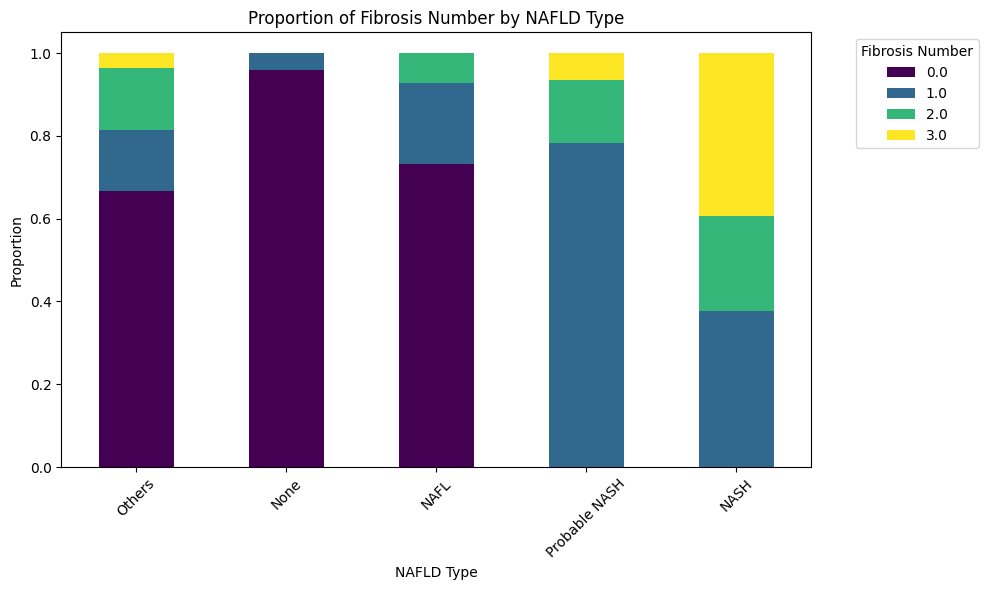

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

custom_order = [
    "Others",
    "None",
    "NAFL",
    "Probable NASH",
    "NASH",
]  # Replace with your desired order

data_xCirr["NAFLD Type"] = pd.Categorical(
    data_xCirr["NAFLD Type"], categories=custom_order, ordered=True
)

# Group and count Fibrosis Number within each NAFLD Type
df_grouped = (
    data_xCirr.groupby("NAFLD Type")["Fibrosis Number"]
    .value_counts(normalize=True)
    .unstack()
)

# Plot stacked bar chart
df_grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("NAFLD Type")
plt.ylabel("Proportion")
plt.title("Proportion of Fibrosis Number by NAFLD Type")
plt.legend(title="Fibrosis Number", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

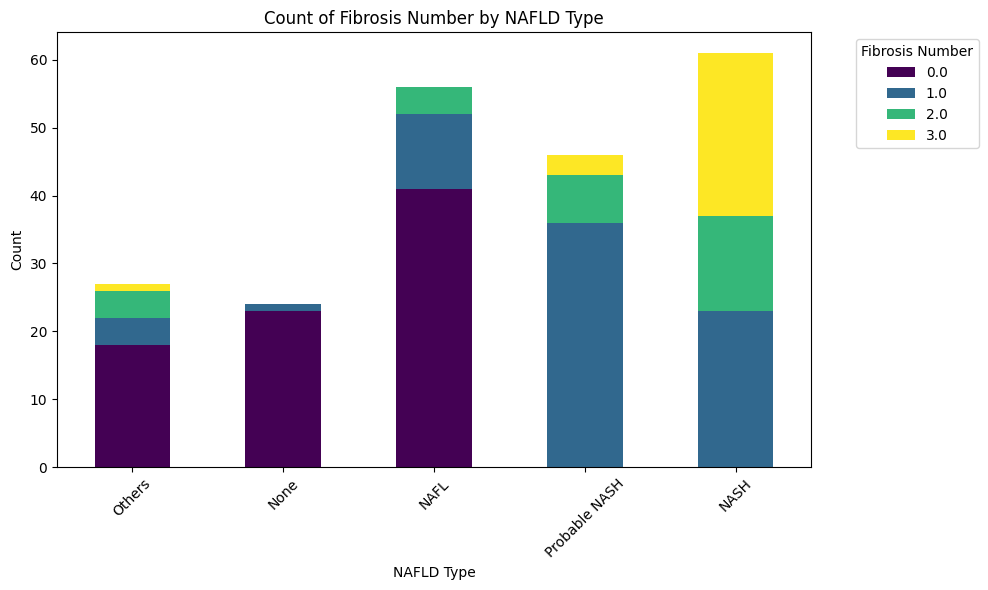

In [ ]:
custom_order = [
    "Others",
    "None",
    "NAFL",
    "Probable NASH",
    "NASH",
]  # Replace with your desired order

data_xCirr["NAFLD Type"] = pd.Categorical(
    data_xCirr["NAFLD Type"], categories=custom_order, ordered=True
)

# Group and count Fibrosis Number within each NAFLD Type
df_grouped = (
    data_xCirr.groupby("NAFLD Type")["Fibrosis Number"].value_counts().unstack()
)

# Plot stacked bar chart with actual counts
df_grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("NAFLD Type")
plt.ylabel("Count")
plt.title("Count of Fibrosis Number by NAFLD Type")
plt.legend(title="Fibrosis Number", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
data_xOthers = data[data["NAFLD Type"] != "Others"]

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기 (사용자가 제공한 데이터)
df = data_xCirr.copy()
# 종속변수 설정
target = "NASH_label"
# 단     "Liver/Spleen HU"는 뒤집어서 마이너스로 생각하기

features = [
    # "VFA (Volume)",
    # "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    # "VFA (Attenuation)",
    # "SFA (Attenuation)",
    # "SMA (Attenuation)",
    "AST",
    "T.bil",
    "Glucose",
    "eGFR",
    "Weight",
    "Height",
    "BMI",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "Liver/Spleen Volume Ratio",
    "mean HU(Liver) - mean HU(Spleen)",
    "Liver/Spleen HU Ratio",
    "Liver Fat (PDFF)",
    "Liver Mask Volume",
    "Spleen Mask Volume",
    "Liver Mean HU",
    "Spleen Mean HU",
]

# 연속형 변수와 범주형 변수 구분
categorical_features = [
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]
continuous_features = [col for col in features if col not in categorical_features]

# AUC 계산
auc_scores = []

for feature in features:
    X = df[feature]
    y = df[target]

    # 범주형 변수 처리 (Label Encoding)
    if feature in categorical_features:
        X = LabelEncoder().fit_transform(X)

    # AUC 계산 (ROC-AUC 직접 계산)
    auc = roc_auc_score(y, X)
    if auc < 0.5:
        auc = 1 - auc
    auc_scores.append([feature, auc])

# 결과 테이블 생성 및 정렬
auc_df = pd.DataFrame(auc_scores, columns=["Feature", "AUC"])
auc_df = auc_df.sort_values(by="AUC", ascending=False)
auc_df

,Feature,AUC
23,Liver/Spleen HU Ratio,0.768975
22,mean HU(Liver) - mean HU(Spleen),0.756747
17,VFI,0.742947
1,VFA (Area),0.734213
27,Liver Mean HU,0.723644
24,Liver Fat (PDFF),0.716831
19,TFI,0.708009
25,Liver Mask Volume,0.686173
10,BMI,0.665255
18,SFI,0.650013


In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기 (사용자가 제공한 데이터)
df = data_xCirr.copy()
# 종속변수 설정
target = "Fibrosis_label"
# 단     "Liver/Spleen HU"는 뒤집어서 마이너스로 생각하기

features = [
    # "VFA (Volume)",
    # "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    # "VFA (Attenuation)",
    # "SFA (Attenuation)",
    # "SMA (Attenuation)",
    "AST",
    "T.bil",
    "Glucose",
    "eGFR",
    "Weight",
    "Height",
    "BMI",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "Liver/Spleen Volume Ratio",
    "mean HU(Liver) - mean HU(Spleen)",
    "Liver/Spleen HU Ratio",
    "Liver Fat (PDFF)",
    "Liver Mask Volume",
    "Spleen Mask Volume",
    "Liver Mean HU",
    "Spleen Mean HU",
]

# 연속형 변수와 범주형 변수 구분
categorical_features = [
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]
continuous_features = [col for col in features if col not in categorical_features]

# AUC 계산
auc_scores = []

for feature in features:
    X = df[feature]
    y = df[target]

    # 범주형 변수 처리 (Label Encoding)
    if feature in categorical_features:
        X = LabelEncoder().fit_transform(X)

    # AUC 계산 (ROC-AUC 직접 계산)
    auc = roc_auc_score(y, X)
    if auc < 0.5:
        auc = 1 - auc
    auc_scores.append([feature, auc])

# 결과 테이블 생성 및 정렬
auc_df = pd.DataFrame(auc_scores, columns=["Feature", "AUC"])
auc_df = auc_df.sort_values(by="AUC", ascending=False)
auc_df

,Feature,AUC
9,Height,0.646329
3,SMA (Area),0.612582
12,고혈압유무,0.591854
11,당뇨병/당뇨병 전단계 유무,0.586378
20,SMI,0.574254
4,AST,0.565873
6,Glucose,0.563136
8,Weight,0.562633
22,mean HU(Liver) - mean HU(Spleen),0.559951
7,eGFR,0.559336
